In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:
# Load the dataset
file_path="/content/pizza_sales.csv"
df=pd.read_csv(file_path)

In [44]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,1,1,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,1,1,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,2,3,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,2,2,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,1,3,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [5]:
df.shape

(48620, 12)

In [6]:
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [8]:
print(df.columns)

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')


In [9]:
print(df.isnull().sum())

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64


In [10]:
# Convert order_date to datetime for time series analysis
df["order_date"]=pd.to_datetime(df["order_date"],errors='coerce',dayfirst=True)

In [11]:
# Basic Statistics
print("Mean of total price:",df["total_price"].mean())
print("Median of total price:",df["total_price"].median())
print("Mode of total price:",df["total_price"].mode()[0])
print("Variance of total price:",df["total_price"].var())
print("Standard Deviation of total price:",df["total_price"].std())
print("Skewness of total price:",df["total_price"].skew())
print("Kurtosis of total price:",df["total_price"].kurt())

Mean of total price: 16.821473673385437
Median of total price: 16.5
Mode of total price: 20.75
Variance of total price: 19.69049729346722
Standard Deviation of total price: 4.4373975811805755
Skewness of total price: 1.7328564007150937
Kurtosis of total price: 8.89508813969252


In [12]:
# Interquartile Range (IQR)
Q1=df["total_price"].quantile(0.25)
Q2=df["total_price"].quantile(0.50)  # Median
Q3=df["total_price"].quantile(0.75)
IQR=Q3-Q1
print("Q1:",Q1)
print("Q2 (Median):",Q2)
print("Q3:",Q3)
print("IQR:",IQR)

Q1: 12.75
Q2 (Median): 16.5
Q3: 20.5
IQR: 7.75


In [13]:
# Detecting Outliers
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
outliers=df[(df["total_price"]<lower_bound) | (df["total_price"]>upper_bound)]
print("Number of Outliers:",len(outliers))

Number of Outliers: 613


In [14]:
# Remove Outliers
Q1 = df["total_price"].quantile(0.25)
Q3 = df["total_price"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["total_price"] >= lower_bound) & (df["total_price"] <= upper_bound)]

In [15]:
# Check Outliers
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
outliers=df[(df["total_price"]<lower_bound) | (df["total_price"]>upper_bound)]
print("Number of Outliers:",len(outliers))

Number of Outliers: 0


In [16]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

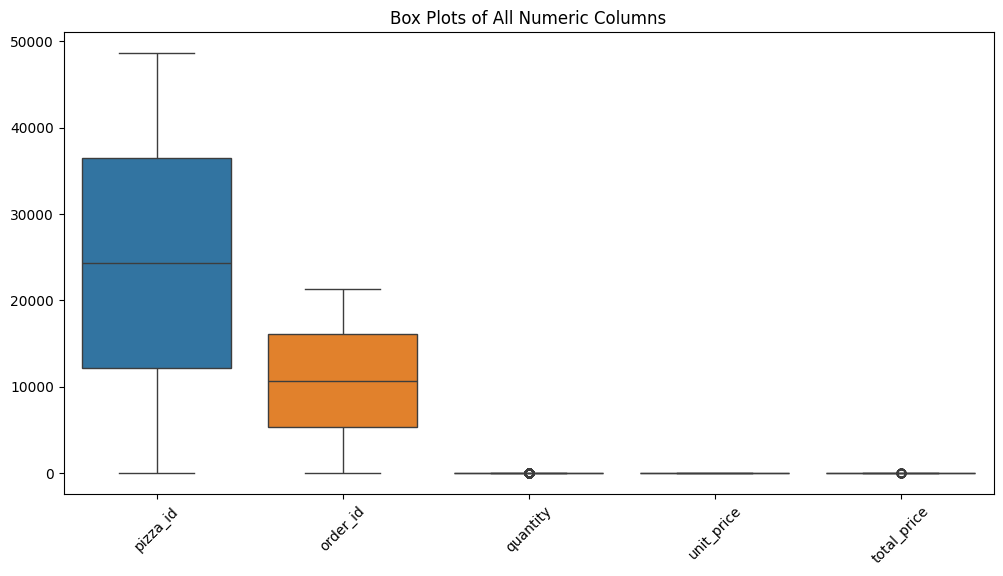

In [17]:
# Box Plot for all numeric columns in one graph
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Box Plots of All Numeric Columns")
plt.show()

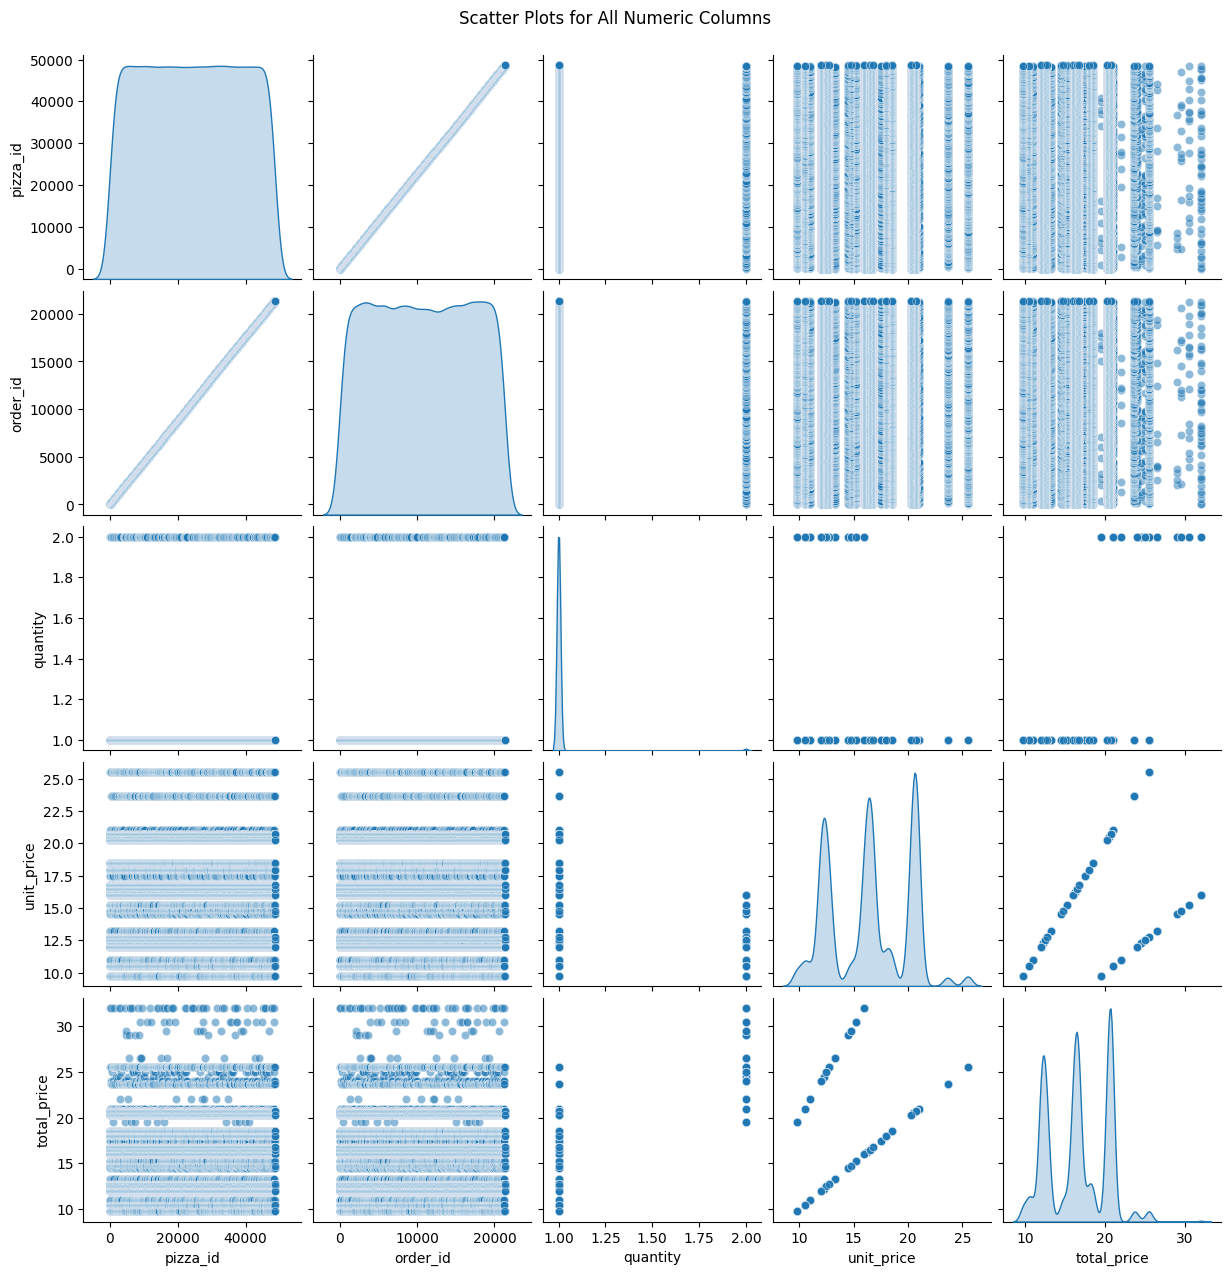

In [18]:
# Scatter Plot for all numeric columns
sns.pairplot(df[numeric_cols], diag_kind='kde', markers='o', plot_kws={'alpha':0.5})
plt.suptitle("Scatter Plots for All Numeric Columns", y=1.02)
plt.show()

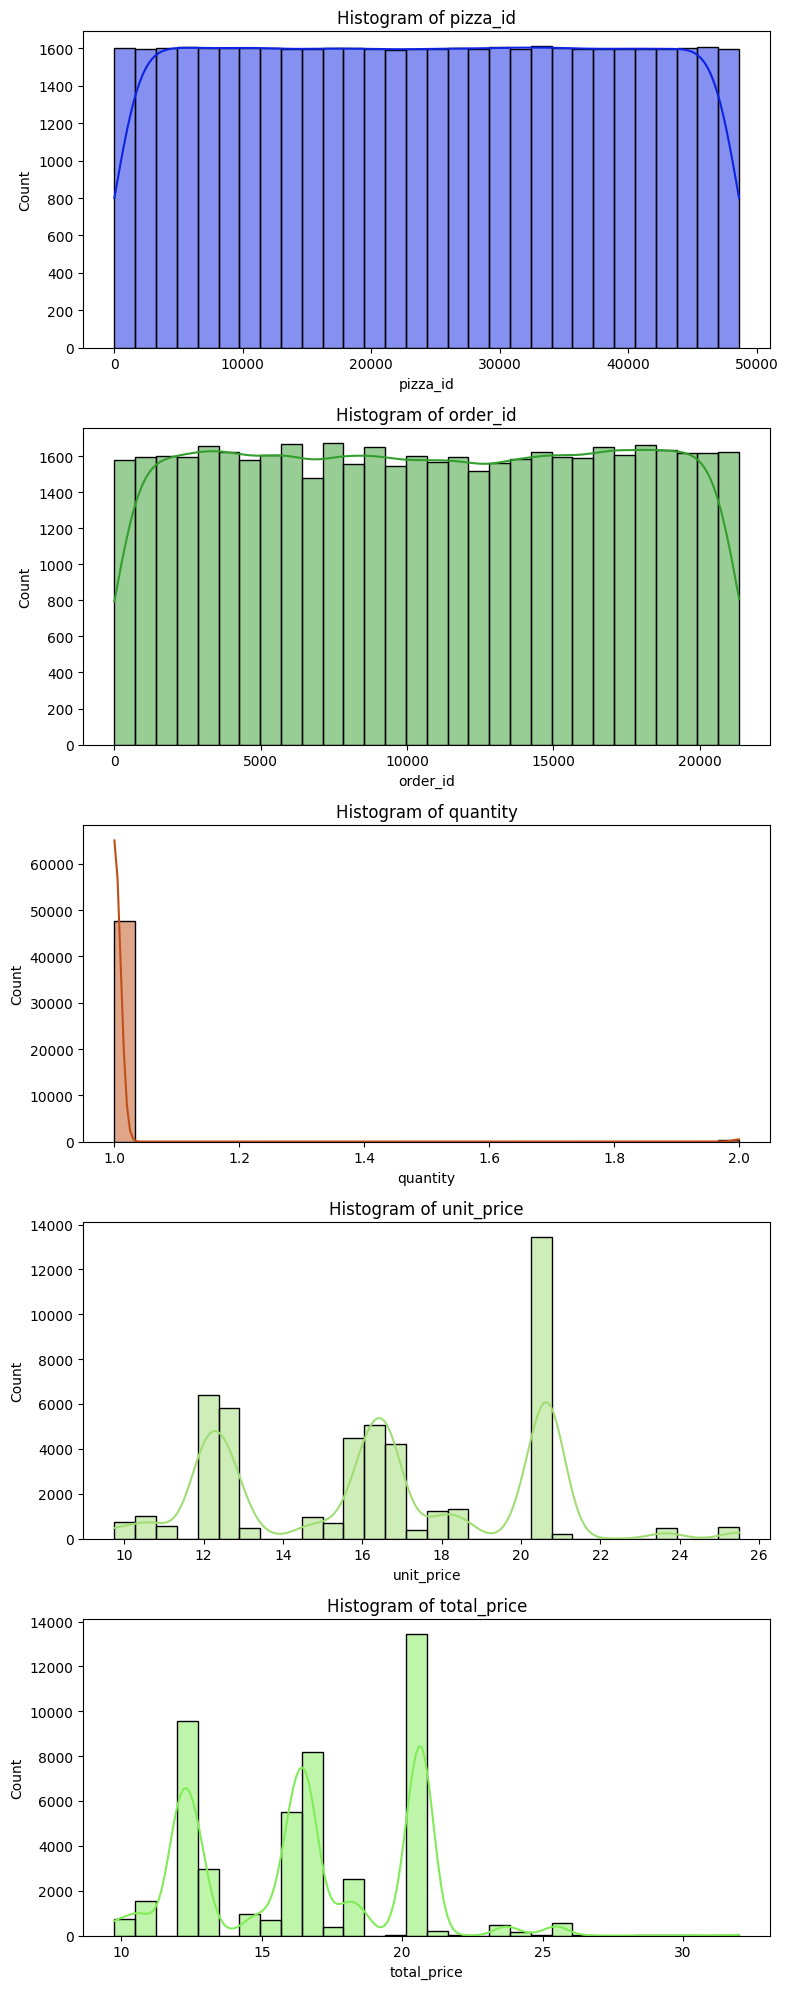

In [19]:
# Histogram for all numeric columns
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(8, len(numeric_cols) * 4))
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color=np.random.rand(3,))
    axes[i].set_title(f"Histogram of {col}")
plt.tight_layout()
plt.show()

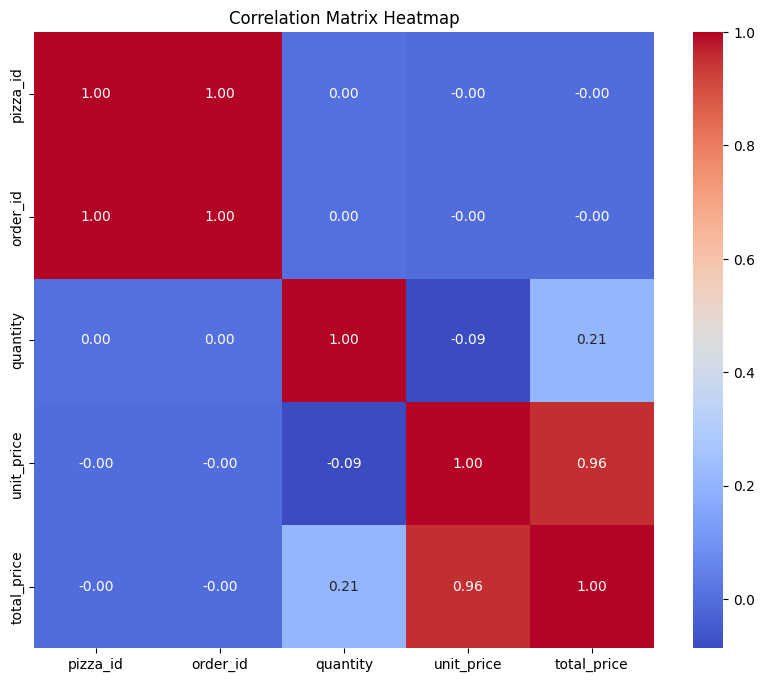

In [20]:
# Correlation Matrix Heatmap (only numeric columns)
plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

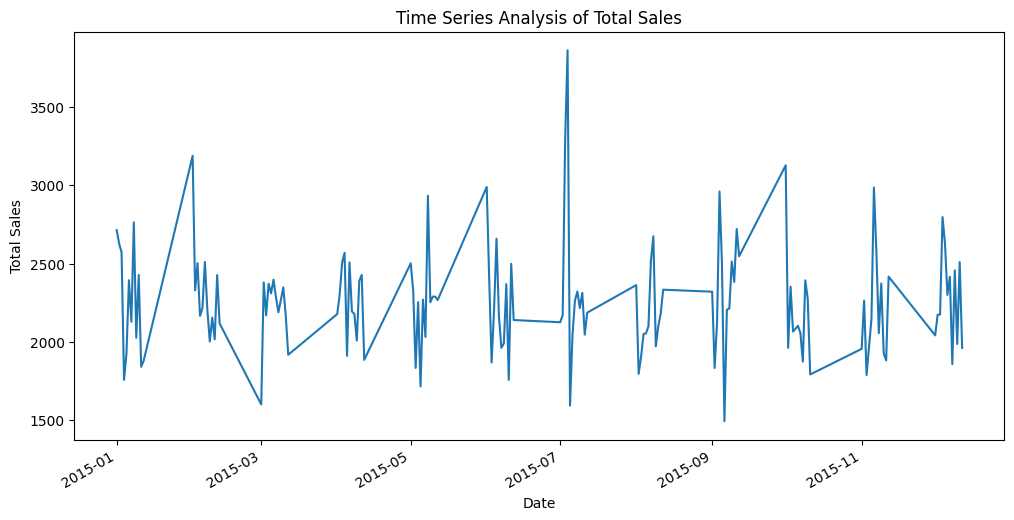

In [21]:
# Time Series Visualization
plt.figure(figsize=(12, 6))
df.groupby("order_date")["total_price"].sum().plot()
plt.title("Time Series Analysis of Total Sales")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

In [22]:
# Convert pizza_size to numeric encoding
df["pizza_size"] = df["pizza_size"].map({"S": 0, "M": 1, "L": 2, "XL": 3, "XXL": 4})

In [23]:
# Prepare data for classification
df["pizza_category"] = df["pizza_category"].astype('category').cat.codes  # Encode categorical target
numeric_columns = ["pizza_id", "order_id", "quantity", "unit_price", "total_price", "pizza_size"]
X = df[numeric_columns]  # Use all specified numeric columns
y = df["pizza_category"]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**RandomForestClassifier**

In [24]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Random Forest):",rf_test_accuracy)

Accuracy (Random Forest): 0.7294313684649032


In [25]:
print("Confusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))

Confusion Matrix (Random Forest):
 [[1554    0  417  160]
 [   0 2445    0  436]
 [ 385    0 1658  263]
 [ 178  475  284 1347]]


In [26]:
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.73      0.73      0.73      2131
           1       0.84      0.85      0.84      2881
           2       0.70      0.72      0.71      2306
           3       0.61      0.59      0.60      2284

    accuracy                           0.73      9602
   macro avg       0.72      0.72      0.72      9602
weighted avg       0.73      0.73      0.73      9602



#**GradientBoostingClassifier**

In [27]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
gb_test_accuracy = accuracy_score(y_test, y_pred_gb)
print("Accuracy (Gradient Boosting):",gb_test_accuracy)

Accuracy (Gradient Boosting): 0.7882732764007498


In [28]:
print("Confusion Matrix (Gradient Boosting):\n", confusion_matrix(y_test, y_pred_gb))

Confusion Matrix (Gradient Boosting):
 [[2124    0    7    0]
 [   0 2526    0  355]
 [ 687    0 1454  165]
 [ 215  465  139 1465]]


In [29]:
print("Classification Report (Gradient Boosting):\n", classification_report(y_test, y_pred_gb))

Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.70      1.00      0.82      2131
           1       0.84      0.88      0.86      2881
           2       0.91      0.63      0.74      2306
           3       0.74      0.64      0.69      2284

    accuracy                           0.79      9602
   macro avg       0.80      0.79      0.78      9602
weighted avg       0.80      0.79      0.78      9602



#**SupportVectorClassifier**

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# Standardize data for SVC
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Train SVC Model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

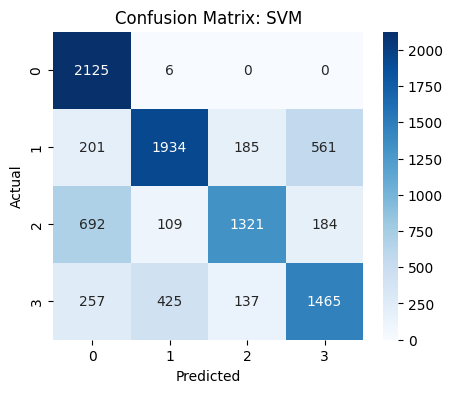

Classification Report: SVM

              precision    recall  f1-score   support

           0       0.65      1.00      0.79      2131
           1       0.78      0.67      0.72      2881
           2       0.80      0.57      0.67      2306
           3       0.66      0.64      0.65      2284

    accuracy                           0.71      9602
   macro avg       0.72      0.72      0.71      9602
weighted avg       0.73      0.71      0.71      9602



In [33]:
# Function to plot confusion matrix and print classification report
def plot_metrics(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)

    # Plot Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Print Classification Report
    print(f"Classification Report: {model_name}\n")
    print(classification_report(y_true, y_pred))

plot_metrics(y_test, y_pred_svm, "SVM")  # Only SVC results

#**Comparision b/w 3 models after StandardScalar**

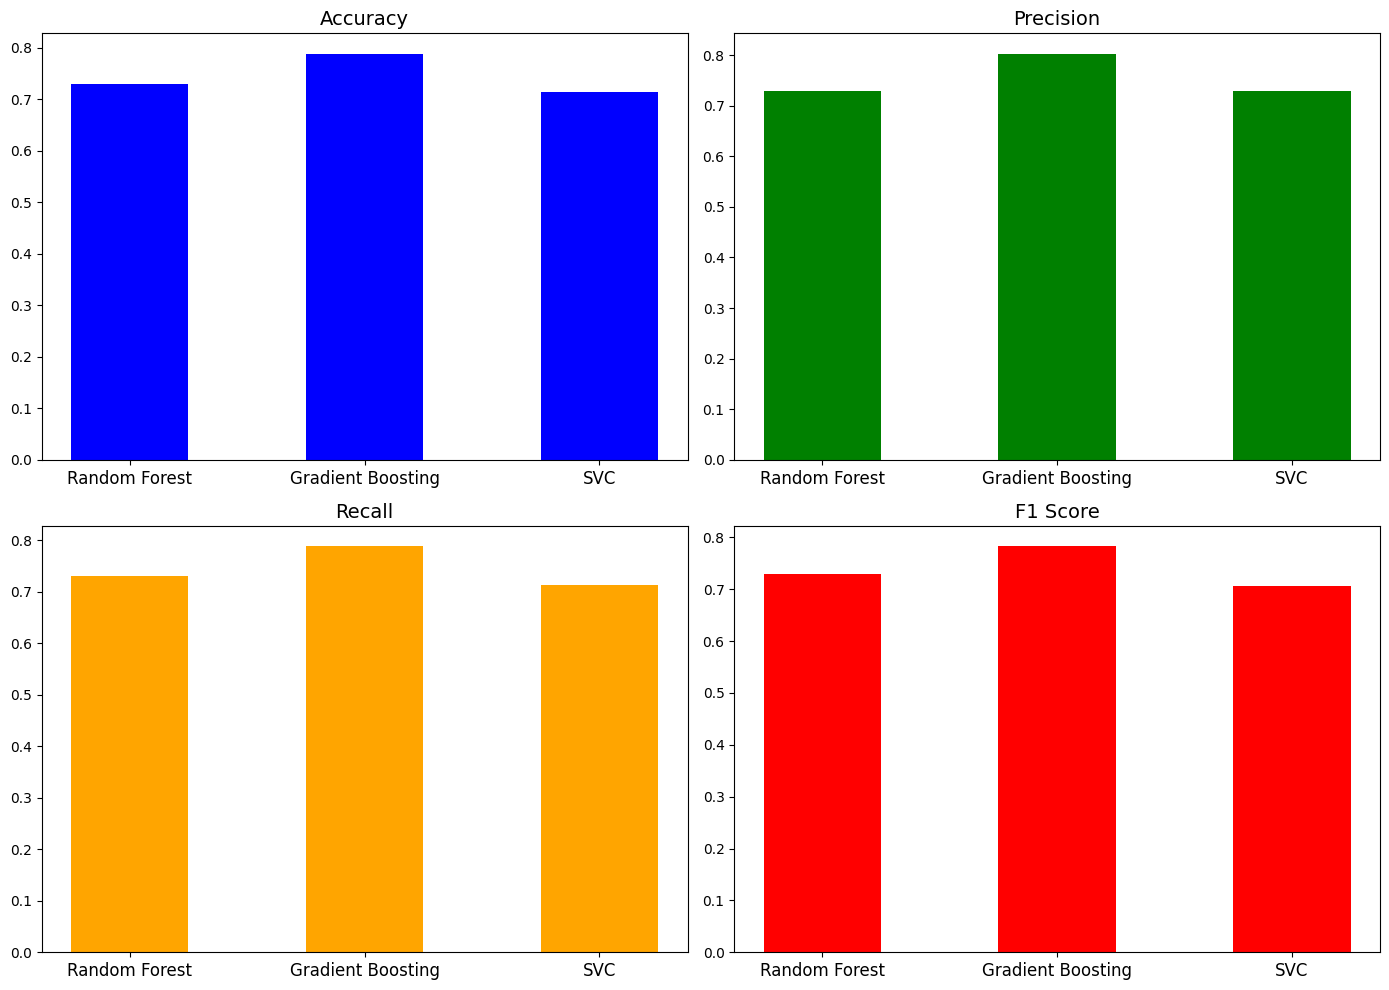

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Standardizing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
svm_model.fit(X_train_scaled, y_train)  # SVM requires scaled data

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test_scaled)

# Accuracy Scores
rf_test_accuracy = accuracy_score(y_test, y_pred_rf)
gb_test_accuracy = accuracy_score(y_test, y_pred_gb)
svm_test_accuracy = accuracy_score(y_test, y_pred_svm)

# Model Comparison Metrics
models = ["Random Forest", "Gradient Boosting", "SVC"]
accuracies = [rf_test_accuracy, gb_test_accuracy, svm_test_accuracy]
precisions = [
    precision_score(y_test, y_pred_rf, average='weighted'),
    precision_score(y_test, y_pred_gb, average='weighted'),
    precision_score(y_test, y_pred_svm, average='weighted')
]
recalls = [
    recall_score(y_test, y_pred_rf, average='weighted'),
    recall_score(y_test, y_pred_gb, average='weighted'),
    recall_score(y_test, y_pred_svm, average='weighted')
]
f1_scores = [
    f1_score(y_test, y_pred_rf, average='weighted'),
    f1_score(y_test, y_pred_gb, average='weighted'),
    f1_score(y_test, y_pred_svm, average='weighted')
]

# Visualization of Performance Metrics
x = np.arange(len(models))
width = 0.5

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy Plot
axes[0, 0].bar(x, accuracies, width, color='blue')
axes[0, 0].set_title('Accuracy', fontsize=14)
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(models, fontsize=12)

# Precision Plot
axes[0, 1].bar(x, precisions, width, color='green')
axes[0, 1].set_title('Precision', fontsize=14)
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(models, fontsize=12)

# Recall Plot
axes[1, 0].bar(x, recalls, width, color='orange')
axes[1, 0].set_title('Recall', fontsize=14)
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(models, fontsize=12)

# F1-Score Plot
axes[1, 1].bar(x, f1_scores, width, color='red')
axes[1, 1].set_title('F1 Score', fontsize=14)
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(models, fontsize=12)

plt.tight_layout()
plt.show()

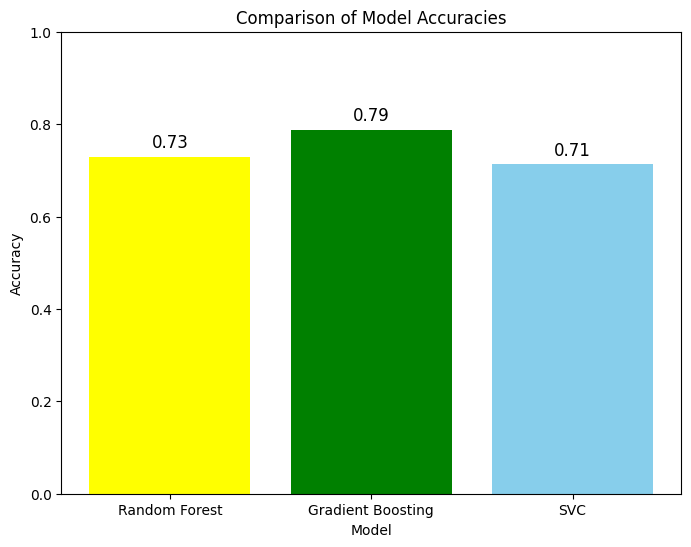

In [35]:
# Simple Accuracy Comparison
results = {"Random Forest": rf_test_accuracy,
           "Gradient Boosting": gb_test_accuracy,
           "SVC": svm_test_accuracy}

plt.figure(figsize=(8,6))
bars = plt.bar(results.keys(), results.values(), color=['yellow', 'green', 'skyblue'])
plt.title("Comparison of Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)

# Add accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', fontsize=12)
plt.show()

#**Tests**

**P-Test (Hypothesis Testing)**

In [49]:
from scipy import stats
import numpy as np
import pandas as pd

# Assuming df is your full dataset
# Hypothesis Test to check if the mean total price differs between two pizza categories
group1 = df[df['pizza_category'] == 1]['total_price']  # Category 1 (e.g., vegetarian)
group2 = df[df['pizza_category'] == 2]['total_price']  # Category 2 (e.g., non-vegetarian)

# Perform t-test (assumes equal variance)
t_stat, p_value = stats.ttest_ind(group1, group2)

print(f"P-Test: T-Statistic: {t_stat}, P-Value: {p_value}")

# Interpretation of the p-value
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in total price between categories.")
else:
    print("Fail to reject the null hypothesis: No significant difference in total price between categories.")

P-Test: T-Statistic: -51.59651082241445, P-Value: 0.0
Reject the null hypothesis: There is a significant difference in total price between categories.


**T-Test**

In [51]:
# T-Test for comparing total price between two pizza categories
t_stat, p_value = stats.ttest_ind(group1, group2)

print(f"T-Test: T-Statistic: {t_stat}, P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference between categories.")
else:
    print("Fail to reject the null hypothesis: No significant difference between categories.")

T-Test: T-Statistic: -51.59651082241445, P-Value: 0.0
Reject the null hypothesis: Significant difference between categories.


**Z-Test**

In [52]:
# Z-Test Example
mean_price = df['total_price'].mean()
std_dev = df['total_price'].std()
sample_size = len(df)

# Hypothesis: H0: mean_price = 15
z_stat = (mean_price - 15) / (std_dev / np.sqrt(sample_size))
p_value = 1 - stats.norm.cdf(z_stat)  # One-sided p-value

print(f"Z-Test: Z-Statistic: {z_stat}, P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The average price is significantly different from $15.")
else:
    print("Fail to reject the null hypothesis: The average price is not significantly different from $15.")

Z-Test: Z-Statistic: 92.13165293809341, P-Value: 0.0
Reject the null hypothesis: The average price is significantly different from $15.


**ANOVA Test**

In [53]:
# ANOVA Test Example
pizza_sizes = df['pizza_size'].unique()  # Get all unique pizza sizes
groups = [df[df['pizza_size'] == size]['total_price'] for size in pizza_sizes]

# Perform ANOVA
f_stat, p_value = stats.f_oneway(*groups)

print(f"ANOVA Test: F-Statistic: {f_stat}, P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in total price across pizza sizes.")
else:
    print("Fail to reject the null hypothesis: No significant difference in total price across pizza sizes.")

ANOVA Test: F-Statistic: 41124.98505414112, P-Value: 0.0
Reject the null hypothesis: Significant difference in total price across pizza sizes.


**Type 1 Error (False Positive) and Type 2 Error (False Negative)**

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

# Assuming df is your full dataset

# Preparing features (X) and target (y)
# You might want to adjust this based on the features available in your dataset
X = df[['quantity', 'pizza_size', 'unit_price']]  # Example features; adjust as needed
y = df['pizza_category']  # Target: pizza category

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Extracting values from the confusion matrix
TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives (Type 1 Error)
FN = cm[1, 0]  # False Negatives (Type 2 Error)

# Calculating Type 1 and Type 2 errors
type_1_error = FP / (FP + TN)  # False Positive Rate
type_2_error = FN / (FN + TP)  # False Negative Rate

print(f"Type 1 Error (False Positive Rate): {type_1_error}")
print(f"Type 2 Error (False Negative Rate): {type_2_error}")

Type 1 Error (False Positive Rate): 0.0
Type 2 Error (False Negative Rate): 0.0
